In [25]:
import sympy as sp

In [26]:
x= sp.symbols('x')

In [41]:
# legendtre operator L_()
# to use .args properly t term is used whose effect will be neglected later and no effect on cofficent by t
def L_(f):
    t=x**2 
    return sp.expand(t*((1-x**2)*sp.diff(f,x,2) -2*x*sp.diff(f,x))) 

In [28]:
P = 4
n = P+1
basis = []
for i in range(n):
    basis.append(x**i)
#basis

In [29]:
#check
tp=L_(basis[1])


In [30]:
#check
tp

-2*x**3

In [31]:
# to store terms corresponding to column vector
Ll=[]
t=[]
for i in range(n):
    t.append(L_(basis[i]))
    Ll.append(t)
    t=[]
Ll

[[0], [-2*x**3], [-6*x**4 + 2*x**2], [-12*x**5 + 6*x**3], [-20*x**6 + 12*x**4]]

In [32]:
# to convert the Ll terms into required matrix ,L, whose eigenvalues and eigen vectors is to be find
import numpy as np
L = np.zeros([n,n])
L[1][1]=-2 # substituting value in 2nd row
L


array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [33]:
#check
Ll[2][0].args

(-6*x**4, 2*x**2)

In [40]:
# filling values in L
# also ist row contains 0 only and 2nd row contains -2 only which is replaced already
# all other remaining rows have 2 elements only
for i in range(2,n):
    l1=Ll[i][0].args[0]
    l2=Ll[i][0].args[1]
    
    l1c=float(l1.args[0])
    l2c=float(l2.args[0])
    
    l1_=l1.args[1]
    l2_=l2.args[1]
    
    l1p=int(l1_.args[1])
    l2p=int(l2_.args[1])
    for j in range(2):
        if j==0:
            L[i][l1p-2]=l1c # power is removed by one which is added extra in L_ function
        else:
            L[i][l2p-2]=l2c

L_f = L.T
print(L_f)

[[  0.   0.   2.   0.   0.]
 [  0.  -2.   0.   6.   0.]
 [  0.   0.  -6.   0.  12.]
 [  0.   0.   0. -12.   0.]
 [  0.   0.   0.   0. -20.]]


In [35]:
#get eigen values and corresponding eigen-vectors of L
evalue,evec = np.linalg.eig(L_f)
evec.T

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [-0.31622777,  0.        ,  0.9486833 ,  0.        ,  0.        ],
       [ 0.        , -0.51449576,  0.        ,  0.85749293,  0.        ],
       [ 0.06494176,  0.        , -0.64941759,  0.        ,  0.75765385]])

In [36]:
basis

[1, x, x**2, x**3, x**4]

In [37]:
# .dot() do dot product of two vectors(evec.T[i] and basis)
# to get evec as function of polynomial 
eigenfn =[]
for i in range(n):
    W = evec.T[i].dot(basis)
    eigenfn.append(W)
eigenfn

[1.00000000000000,
 1.0*x,
 0.948683298050514*x**2 - 0.316227766016838,
 0.857492925712544*x**3 - 0.514495755427526*x,
 0.757653854143933*x**4 - 0.649417589266229*x**2 + 0.0649417589266229]

Text(0.5, 1.0, 'Legendre :: Linear Transformation')

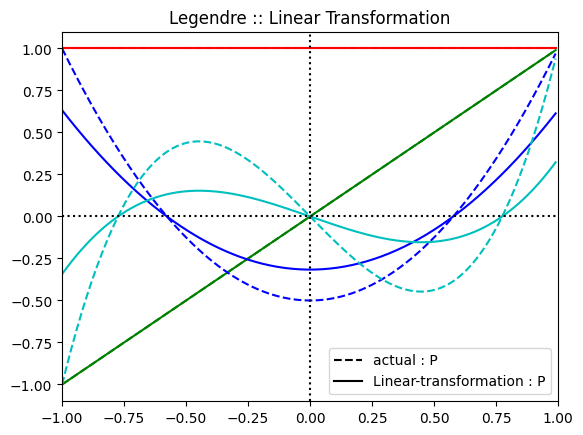

In [38]:
#plot
import matplotlib.pyplot as plt
from scipy.special import legendre

#color list in order to make sure that legendre actual-P and P has same color
clr=['r','g','b','c','m','k','y','w']

factor=0.01
t1= list(np.arange(-1,1,factor))

Efinal = []

#plot is upto degree of basis
pv=4
assert pv<=n

for i in range(pv):
    EF = []
    for j in t1:
#         p = eigenfn[i].subs({x:float(j)})               #converts the variable x in eigenfn to j
#         EF.append(p)
            #or
          q = sp.lambdify(x,eigenfn[i])
          p = q(float(j))
          EF.append(p)
    Efinal.append(EF)
    EF=[]
    
    leg=legendre(i)
    plt.plot(t1,leg(t1),ls="--",c=clr[i])
    plt.plot(t1,Efinal[i],c=clr[i])
        
plt.xlim([-1,1])


plt.plot(0,label='actual : P',c='k',ls='--')
plt.plot(0,label='Linear-transformation : P',c='k')
plt.legend(loc='best')
plt.axvline(x=0,c='k',ls=':')
plt.axhline(y=0,c='k',ls=':')
plt.title("Legendre :: Linear Transformation")

# print(Efinal)
# plt.yticks(np.arange(-1,1,0.1))
# plt.xticks(np.arange(-1,1,0.1))

the difference between actual-P and P always remains and cannot be removed by variable factor

In [48]:
##check
# from scipy.special import legendre
# l=legendre(2)
# #t=np.linspace(-1,1,100)
# t= list(np.arange(-1,1,accuracy))

# plt.plot(t,l(t))

In [24]:
##check
# EF=[]
# t1= list(np.arange(-1,1,0.1))
# for j in t1:
#     q = sp.lambdify(x,eigenfn[2])
#     p=q(float(j))#converts the variable x in eigenfn to j
#     EF.append(p)
# EF